1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.
2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

In [287]:
import pandas as pd
import seaborn as sns
import pdb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [288]:
house = pd.read_csv(r"C:\Users\Oscar_On\Downloads\kc_house_data.csv")

In [289]:
house['date'] = house['date'].str[:8]

house['date'] = pd.to_datetime(house['date'], format='%Y%m%d')

# Print the updated DataFrame
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [290]:
# Extract hour, month, day into new columns

house['month'] = house['date'].dt.month

house['day'] = house['date'].dt.day


In [291]:
'''def (temp,hum):
    if temp > 25 and hum > 70:
        return 'too hot'
    elif temp <=25 and hum >= 50 and hum <= 70:
        return 'so so day'
    else:
        return 'good day' '''

"def (temp,hum):\n    if temp > 25 and hum > 70:\n        return 'too hot'\n    elif temp <=25 and hum >= 50 and hum <= 70:\n        return 'so so day'\n    else:\n        return 'good day' "

In [292]:
# house['quarter'] = house['month'].apply(total_cat)

In [293]:
unique_count = house['grade'].nunique()
unique_count

12

In [294]:
# grade_dummies = pd.get_dummies(house['grade'])

In [295]:
# house = pd.concat([house,grade_dummies], axis=1)

In [296]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,18


In [297]:
pd.set_option('display.max_columns', None)

house.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,15.688197
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,8.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,16.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,23.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,31.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,8.635063


In [298]:
# drop column

columns_to_drop = ['lat', 'long', 'id']
house = house.drop(columns_to_drop, axis = 1)

Create testing 1 df

In [299]:
house_test1 = house

In [300]:
# Calculate the IQR for each column
Q1 = house_test1.quantile(0.25)
Q3 = house_test1.quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Create a boolean mask to identify outlier rows for each column
outlier_mask = (house_test1 < (Q1 - threshold * IQR)) | (house > (Q3 + threshold * IQR))

# Drop rows with outliers for all columns
house_test1_cleaned = house_test1[~outlier_mask.any(axis=1)]

# Reset the index of the cleaned DataFrame
house_test1_cleaned.reset_index(drop=True, inplace=True)

# Describe the cleaned DataFrame
house_test1_cleaned.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,day
count,15071,1.507100e+04,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000,15071.0,15071.0,15071.000000,15071.000000,15071.000000,15071.000000,15071.00000,15071.0,15071.000000,15071.000000,15071.000000,15071.000000,15071.000000
mean,2014-10-30 03:08:42.407272192,4.377983e+05,3.261628,1.972115,1813.719727,7018.010616,1.471137,0.0,0.0,3.418751,7.379471,1586.095216,227.624511,1971.82682,0.0,98079.435738,1796.264415,6898.490810,6.568642,15.713689
min,2014-05-02 00:00:00,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,480.000000,0.000000,1900.00000,0.0,98001.000000,620.000000,651.000000,1.000000,1.000000
25%,2014-07-23 00:00:00,3.000000e+05,3.000000,1.500000,1350.000000,4720.000000,1.000000,0.0,0.0,3.000000,7.000000,1140.000000,0.000000,1953.00000,0.0,98033.000000,1420.000000,4800.000000,4.000000,8.000000
50%,2014-10-17 00:00:00,4.050000e+05,3.000000,2.000000,1740.000000,7068.000000,1.000000,0.0,0.0,3.000000,7.000000,1430.000000,0.000000,1975.00000,0.0,98065.000000,1700.000000,7200.000000,6.000000,16.000000
75%,2015-02-18 00:00:00,5.450000e+05,4.000000,2.500000,2210.000000,8990.500000,2.000000,0.0,0.0,4.000000,8.000000,1910.000000,440.000000,1999.00000,0.0,98118.000000,2090.500000,8700.000000,9.000000,23.000000
max,2015-05-24 00:00:00,1.127000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,0.0,0.0,5.000000,9.000000,3740.000000,1400.000000,2015.00000,0.0,98199.000000,3640.000000,17550.000000,12.000000,31.000000
std,NaN,1.798911e+05,0.771481,0.645436,614.489321,3367.154125,0.547325,0.0,0.0,0.646478,0.804137,601.692800,352.498932,29.20239,0.0,53.347959,507.881884,3002.869325,3.125454,8.601838


In [301]:
house_test1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15071 entries, 0 to 15070
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           15071 non-null  datetime64[ns]
 1   price          15071 non-null  float64       
 2   bedrooms       15071 non-null  int64         
 3   bathrooms      15071 non-null  float64       
 4   sqft_living    15071 non-null  int64         
 5   sqft_lot       15071 non-null  int64         
 6   floors         15071 non-null  float64       
 7   waterfront     15071 non-null  int64         
 8   view           15071 non-null  int64         
 9   condition      15071 non-null  int64         
 10  grade          15071 non-null  int64         
 11  sqft_above     15071 non-null  int64         
 12  sqft_basement  15071 non-null  int64         
 13  yr_built       15071 non-null  int64         
 14  yr_renovated   15071 non-null  int64         
 15  zipcode        1507

In [302]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

Using outlier formula will drop more than 6000 records, which drpos too much.

In [303]:
house_t2 = house

In [304]:
# clean outlier for the price column    

Q1 = house_t2['price'].quantile(0.25)
Q3 = house_t2['price'].quantile(0.75)
IQR = Q3 - Q1

plower_thresold = Q1 - 1.5*IQR
pupper_thresold = Q3 + 1.5*IQR

house_t2 = house.drop(house[house['price'] < plower_thresold].index)

house_t2 = house.drop(house[house['price'] > pupper_thresold].index)

house_t2.reset_index(drop=True, inplace=True)

house_t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           20467 non-null  datetime64[ns]
 1   price          20467 non-null  float64       
 2   bedrooms       20467 non-null  int64         
 3   bathrooms      20467 non-null  float64       
 4   sqft_living    20467 non-null  int64         
 5   sqft_lot       20467 non-null  int64         
 6   floors         20467 non-null  float64       
 7   waterfront     20467 non-null  int64         
 8   view           20467 non-null  int64         
 9   condition      20467 non-null  int64         
 10  grade          20467 non-null  int64         
 11  sqft_above     20467 non-null  int64         
 12  sqft_basement  20467 non-null  int64         
 13  yr_built       20467 non-null  int64         
 14  yr_renovated   20467 non-null  int64         
 15  zipcode        2046

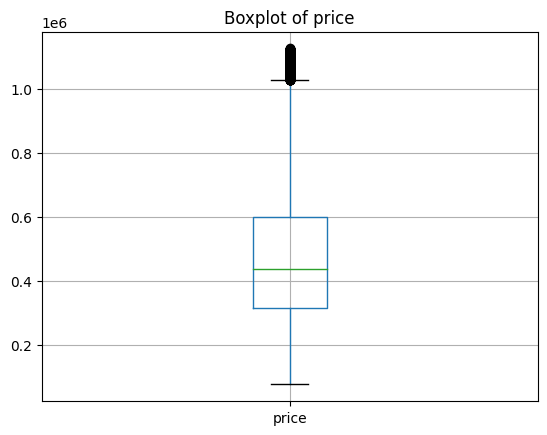

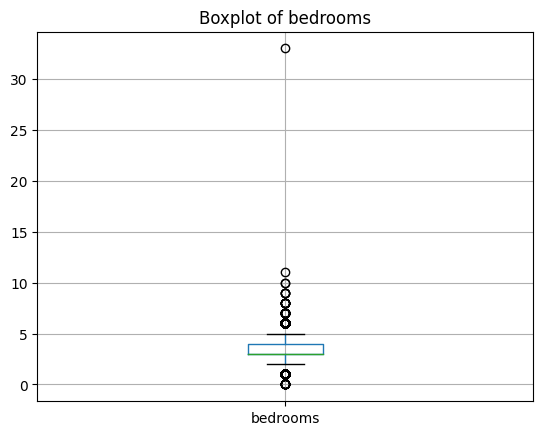

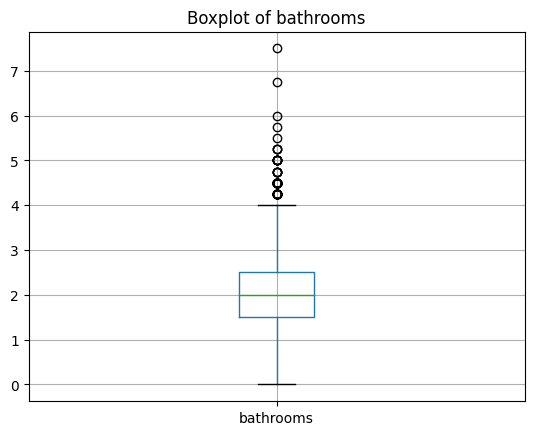

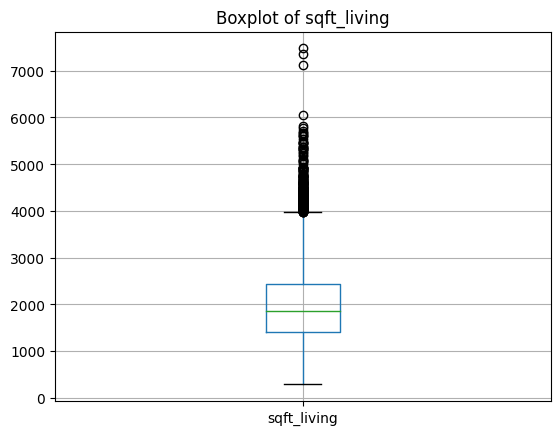

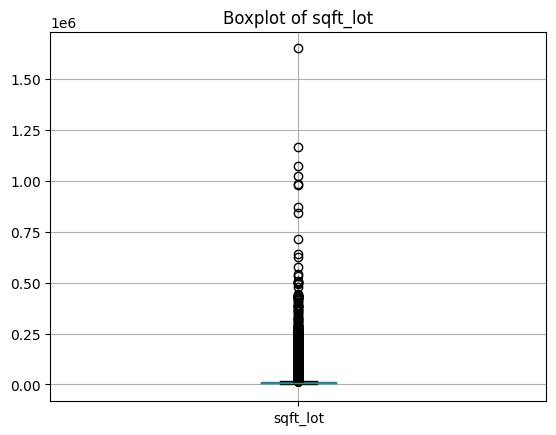

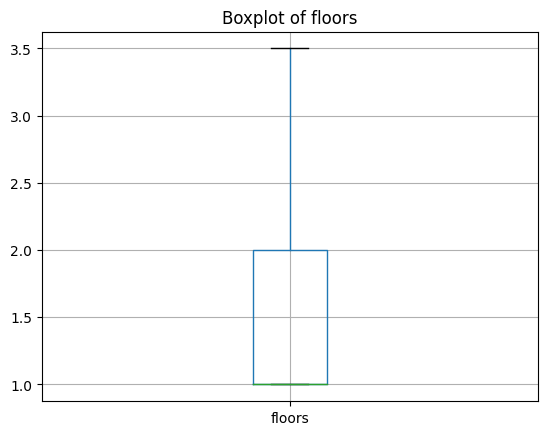

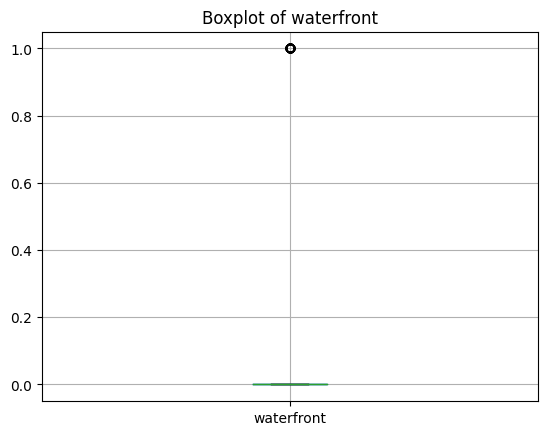

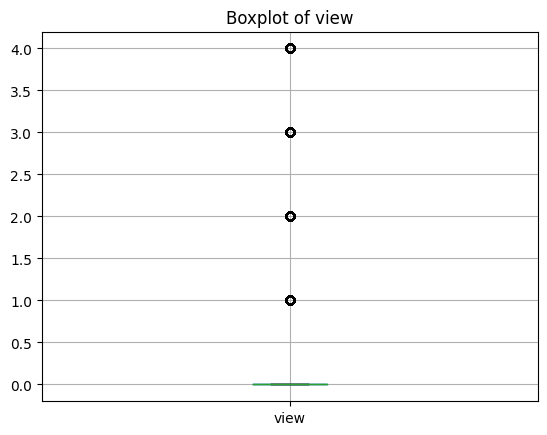

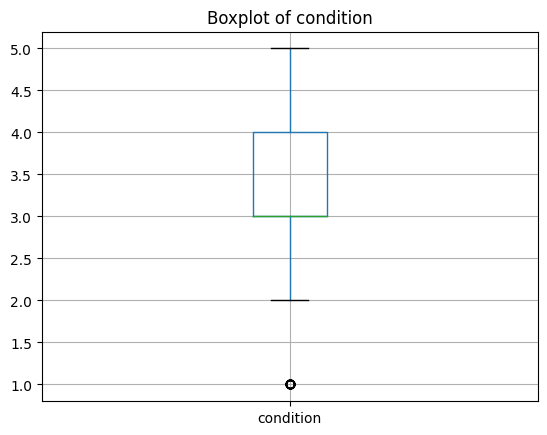

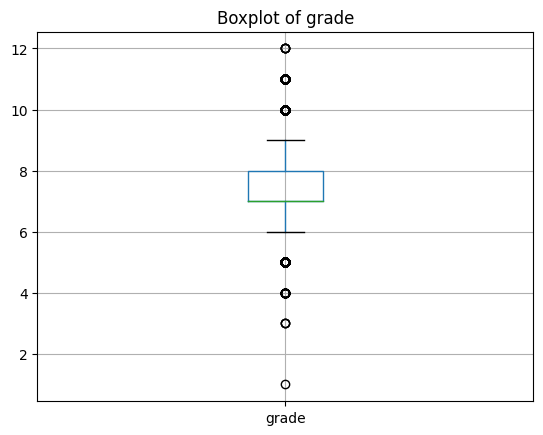

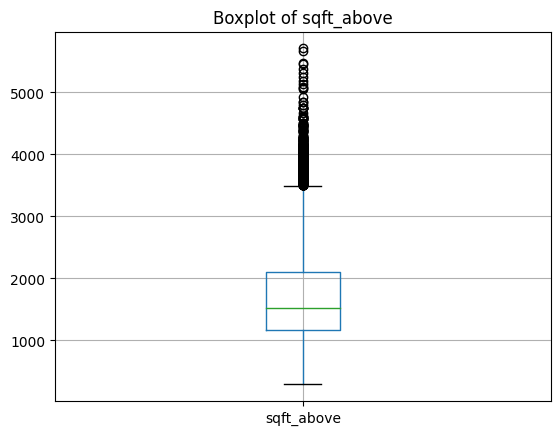

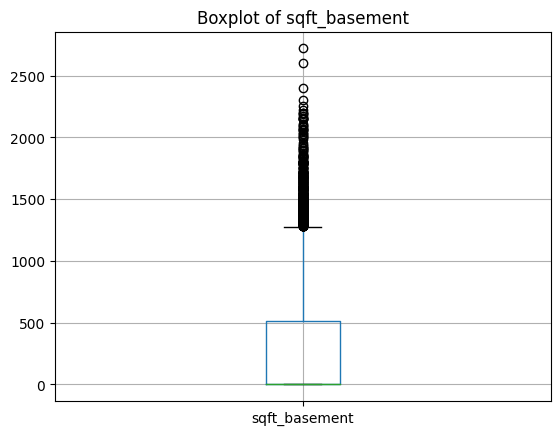

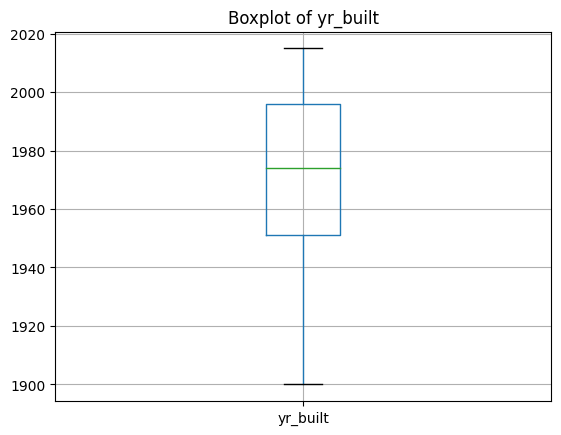

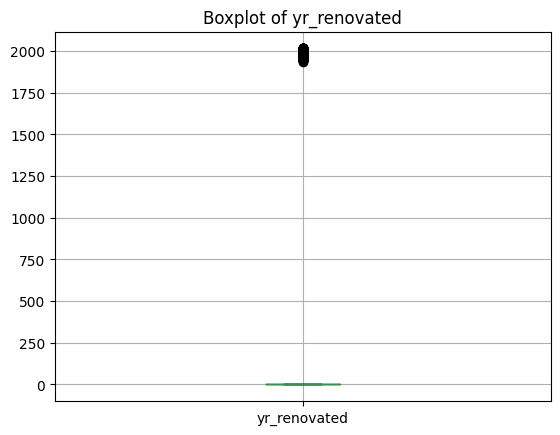

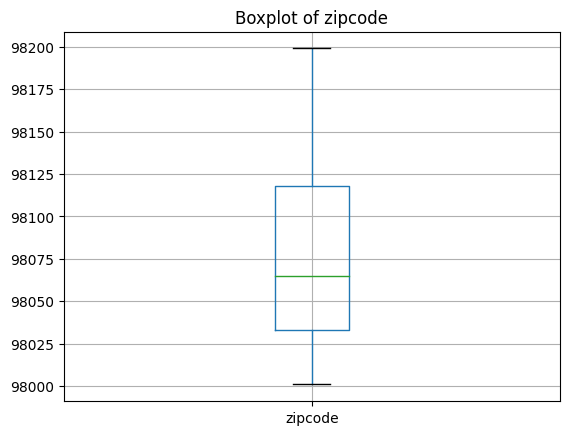

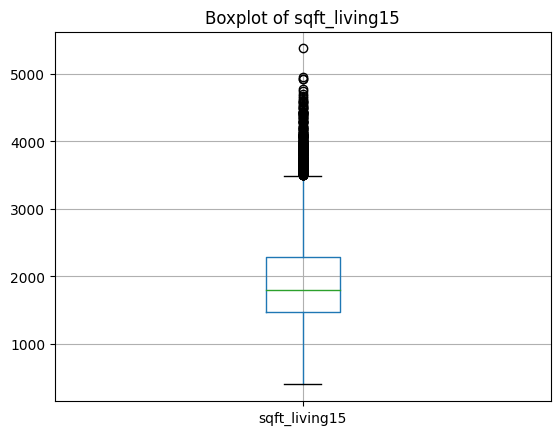

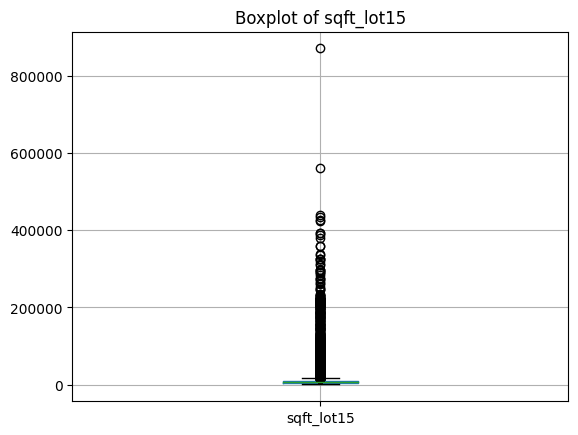

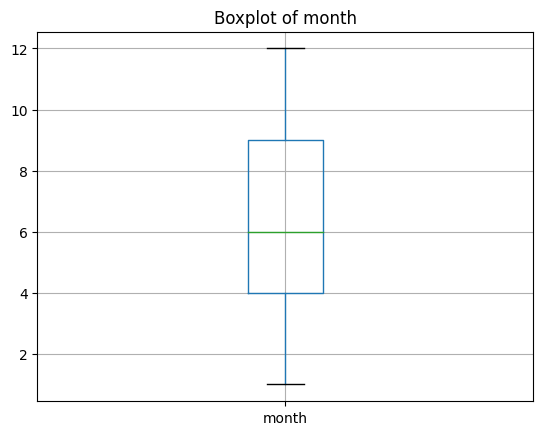

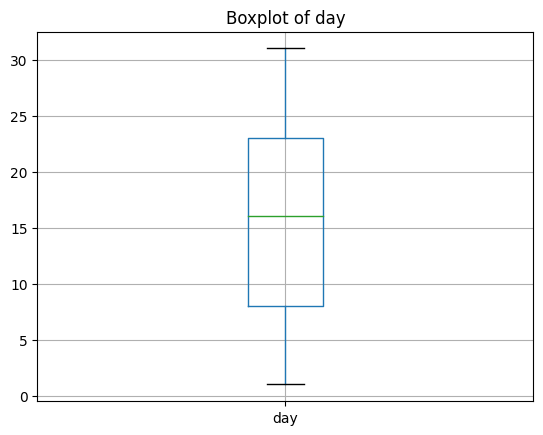

In [305]:
numerical_columns = house_t2.select_dtypes(include=['int', 'float']).columns

# Create separate boxplots for numerical columns
for column in numerical_columns:
    plt.figure()  # Create a new figure for each boxplot
    house_t2.boxplot(column=column)
    plt.title(f"Boxplot of {column}")  # Set the title for each boxplot
    plt.show()

In [306]:
house_t2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           20467 non-null  datetime64[ns]
 1   price          20467 non-null  float64       
 2   bedrooms       20467 non-null  int64         
 3   bathrooms      20467 non-null  float64       
 4   sqft_living    20467 non-null  int64         
 5   sqft_lot       20467 non-null  int64         
 6   floors         20467 non-null  float64       
 7   waterfront     20467 non-null  int64         
 8   view           20467 non-null  int64         
 9   condition      20467 non-null  int64         
 10  grade          20467 non-null  int64         
 11  sqft_above     20467 non-null  int64         
 12  sqft_basement  20467 non-null  int64         
 13  yr_built       20467 non-null  int64         
 14  yr_renovated   20467 non-null  int64         
 15  zipcode        2046

In [307]:
# remove outliers for other columns

house_t2 = house_t2.drop(house_t2[house_t2['bedrooms'] > 30].index)

house_t2 = house_t2.drop(house_t2[house_t2['sqft_living'] > 6000].index)

house_t2 = house_t2.drop(house_t2[house_t2['sqft_lot'] > 0.75*1000000].index)

house_t2 = house_t2.drop(house_t2[house_t2['sqft_above'] > 5000].index)

house_t2 = house_t2.drop(house_t2[house_t2['sqft_basement'] > 2500].index)

house_t2 = house_t2.drop(house_t2[house_t2['sqft_living15'] > 5000].index)

house_t2 = house_t2.drop(house_t2[house_t2['sqft_lot15'] > 400000].index)

house_t2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20439 entries, 0 to 20466
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           20439 non-null  datetime64[ns]
 1   price          20439 non-null  float64       
 2   bedrooms       20439 non-null  int64         
 3   bathrooms      20439 non-null  float64       
 4   sqft_living    20439 non-null  int64         
 5   sqft_lot       20439 non-null  int64         
 6   floors         20439 non-null  float64       
 7   waterfront     20439 non-null  int64         
 8   view           20439 non-null  int64         
 9   condition      20439 non-null  int64         
 10  grade          20439 non-null  int64         
 11  sqft_above     20439 non-null  int64         
 12  sqft_basement  20439 non-null  int64         
 13  yr_built       20439 non-null  int64         
 14  yr_renovated   20439 non-null  int64         
 15  zipcode        20439 non

In [308]:
house_cleaned = house_t2

In [309]:
house_cleaned

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20462,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,5,21
20463,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2,23
20464,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,6,23
20465,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,1,16


<Axes: xlabel='sqft_living', ylabel='price'>

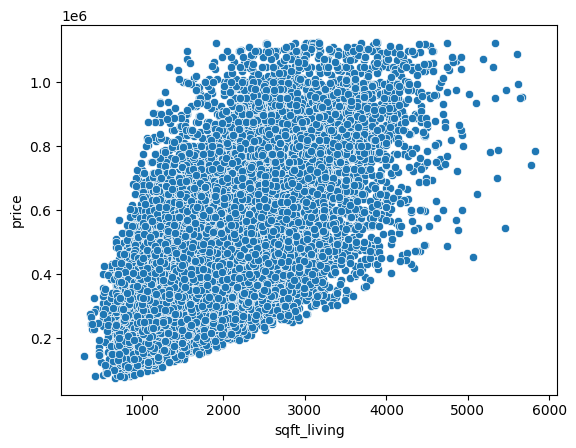

In [310]:
sns.scatterplot(x= 'sqft_living', y= 'price', data= house_cleaned)

<Axes: xlabel='sqft_living15', ylabel='price'>

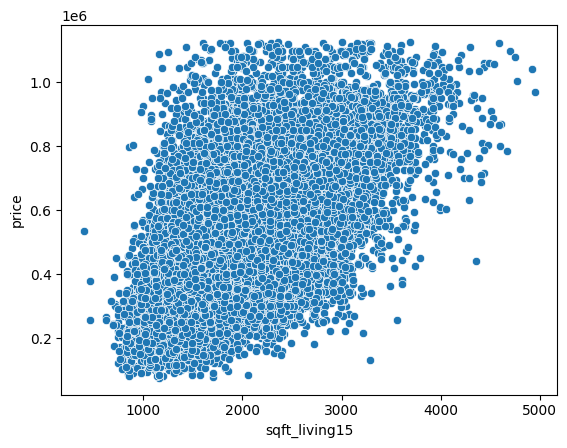

In [311]:
sns.scatterplot(x= 'sqft_living15', y= 'price', data= house_cleaned)

<Axes: xlabel='sqft_lot', ylabel='price'>

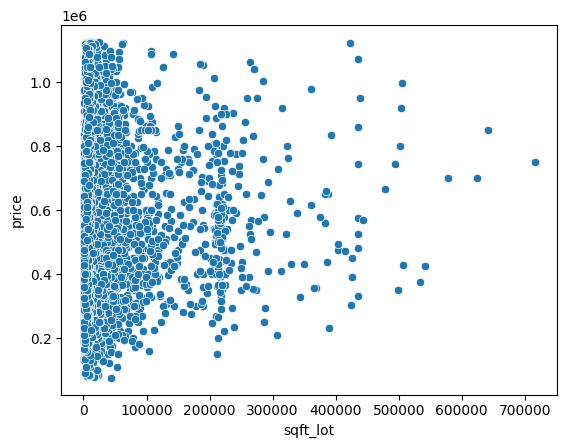

In [312]:
sns.scatterplot(x= 'sqft_lot', y= 'price', data= house_cleaned)

<Axes: xlabel='sqft_lot15', ylabel='price'>

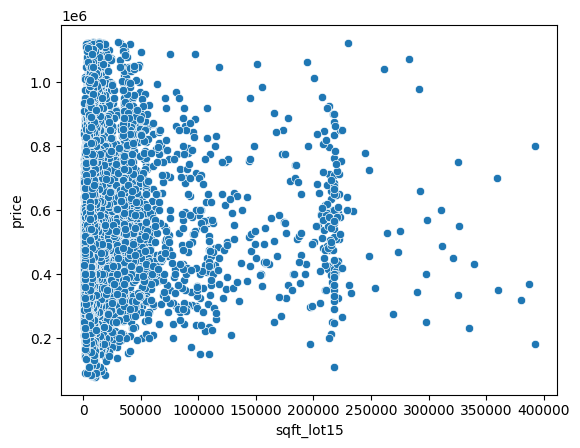

In [313]:
sns.scatterplot(x= 'sqft_lot15', y= 'price', data= house_cleaned)

In [314]:
results = ols("price ~ sqft_living + grade + bedrooms + bathrooms + yr_built + yr_renovated", data=house_cleaned).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     4218.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:44:18   Log-Likelihood:            -2.7105e+05
No. Observations:               20439   AIC:                         5.421e+05
Df Residuals:                   20432   BIC:                         5.422e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.809e+06   8.27e+04     58.136   

In [315]:
# pdb.set_trace('q')

In [316]:
pred_vals1 = results.predict(house_cleaned[['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated']])

In [317]:
house_cleaned

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20462,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,5,21
20463,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2,23
20464,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,6,23
20465,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,1,16


In [318]:
pred_vals1

0        353823.959448
1        545836.135290
2        291010.357733
3        462935.309445
4        459042.056368
             ...      
20462    406751.753708
20463    445829.915786
20464    202295.289460
20465    426691.038245
20466    204992.811587
Length: 20439, dtype: float64

In [319]:
res1 = pd.concat([pred_vals1.to_frame().rename(columns={0:'y_hat'}),house_cleaned['price']], axis=1)

In [320]:
res1['error'] = res1['y_hat'] - res1['price']

In [321]:
res1['sq_error'] = res1['error']**2

np.sqrt(res1['sq_error'].mean())

139018.76302098492

In [322]:
house_cleaned['price'].mean()

476521.72943881794

(array([4.000e+00, 2.400e+01, 1.780e+02, 7.300e+02, 2.889e+03, 7.465e+03,
        6.921e+03, 2.015e+03, 2.000e+02, 1.300e+01]),
 array([-797277.78726852, -660363.62089799, -523449.45452746,
        -386535.28815693, -249621.1217864 , -112706.95541586,
          24207.21095467,  161121.3773252 ,  298035.54369573,
         434949.71006626,  571863.8764368 ]),
 <BarContainer object of 10 artists>)

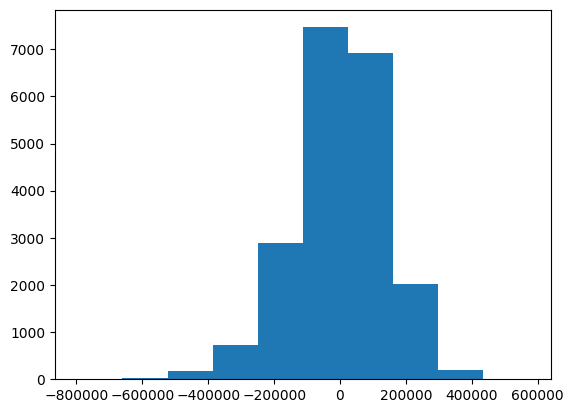

In [323]:
plt.hist(res1['error'])

In [324]:
res1

,y_hat,price,error,sq_error
0,353823.959448,221900.0,131923.959448,1.740393e+10
1,545836.135290,538000.0,7836.135290,6.140502e+07
2,291010.357733,180000.0,111010.357733,1.232330e+10
3,462935.309445,604000.0,-141064.690555,1.989925e+10
4,459042.056368,510000.0,-50957.943632,2.596712e+09
...,...,...,...,...
20462,406751.753708,360000.0,46751.753708,2.185726e+09
20463,445829.915786,400000.0,45829.915786,2.100381e+09
20464,202295.289460,402101.0,-199805.710540,3.992232e+10
20465,426691.038245,400000.0,26691.038245,7.124115e+08


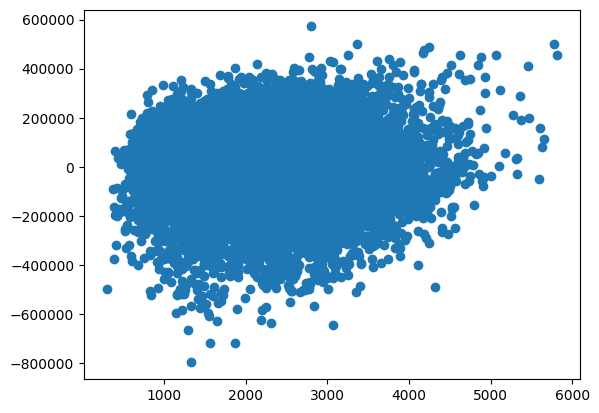

In [325]:
plt.scatter(house_cleaned['sqft_living'],res1['error'])

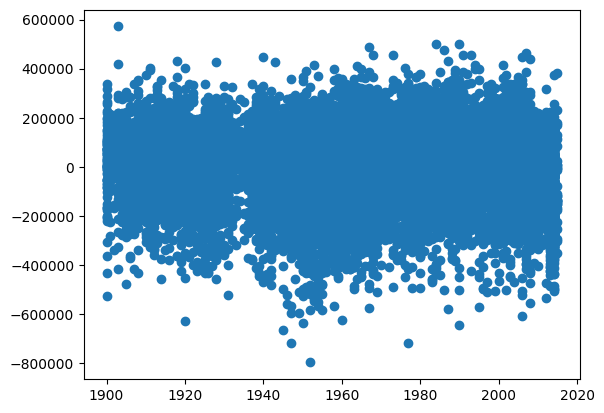

In [326]:
plt.scatter(house_cleaned['yr_built'],res1['error'])

((array([-3.98379009, -3.76788988, -3.64976171, ...,  3.64976171,
          3.76788988,  3.98379009]),
  array([-797277.78726852, -718297.6556464 , -717617.48062987, ...,
          498430.61745791,  502183.02332736,  571863.8764368 ])),
 (138286.89863090153, 2.4236740684162902e-09, 0.9945492143232507))

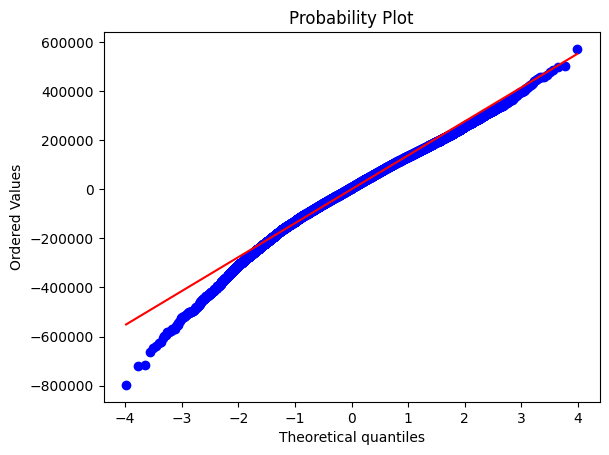

In [327]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res1['error'], dist='norm', plot=ax)

In [328]:
'''infl = results.get_influence()
#print(infl.summary_frame())'''

'infl = results.get_influence()\n#print(infl.summary_frame())'

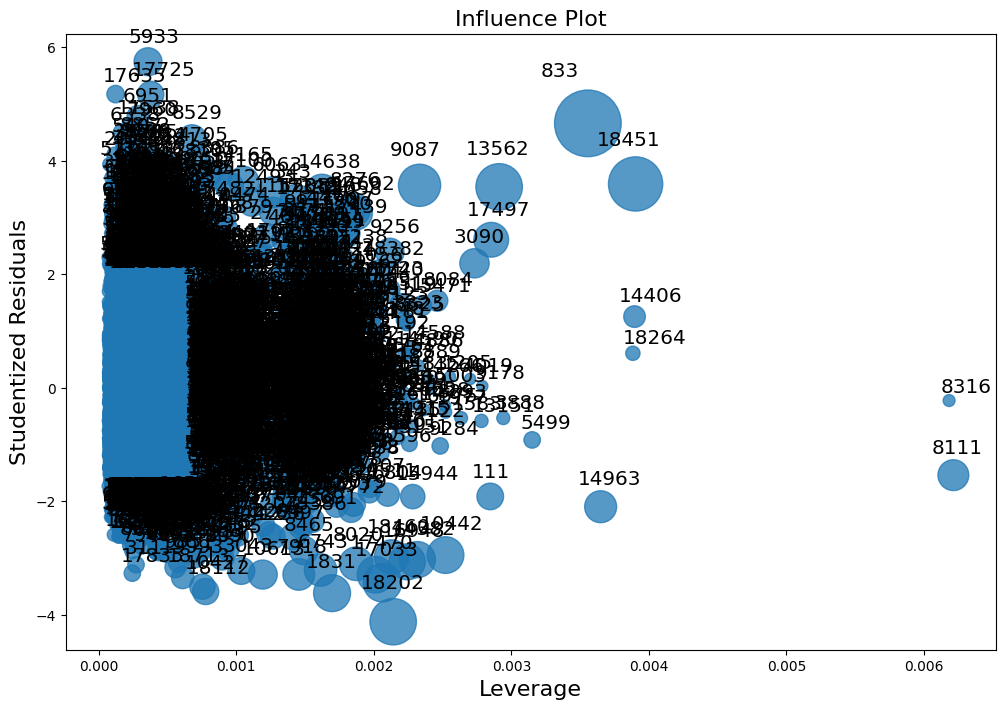

In [329]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

Daily

In [330]:
daily_dataset = house_cleaned.set_index('date').resample("D").agg({
    'price': 'mean',
    'sqft_living': 'mean',
    'grade': 'mean',
    'bedrooms': 'mean',
    'bathrooms': 'mean',
    'yr_built': 'mean',
    'yr_renovated': 'mean'
})

In [331]:
results_1 = ols("price ~ sqft_living + grade + bedrooms + bathrooms + yr_built + yr_renovated", data=daily_dataset).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     4218.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:52:06   Log-Likelihood:            -2.7105e+05
No. Observations:               20439   AIC:                         5.421e+05
Df Residuals:                   20432   BIC:                         5.422e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.809e+06   8.27e+04     58.136   

In [332]:
pred_vals2 = results.predict(daily_dataset[['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'yr_built', 'yr_renovated']])

In [333]:
res2 = pd.concat([pred_vals2.to_frame().rename(columns={0:'y_hat'}),daily_dataset['price']], axis=1)

res2['error'] = res2['y_hat'] - res2['price']

res2['sq_error'] = res2['error']**2

np.sqrt(res2['sq_error'].mean())

49394.51841310386

In [334]:
daily_dataset['price'].mean()

479020.8724741965

(array([  1.,   0.,   1.,   7.,   9.,  31., 217.,  91.,  10.,   4.]),
 array([-350031.41418133, -297647.34063477, -245263.2670882 ,
        -192879.19354164, -140495.11999508,  -88111.04644851,
         -35726.97290195,   16657.10064461,   69041.17419118,
         121425.24773774,  173809.3212843 ]),
 <BarContainer object of 10 artists>)

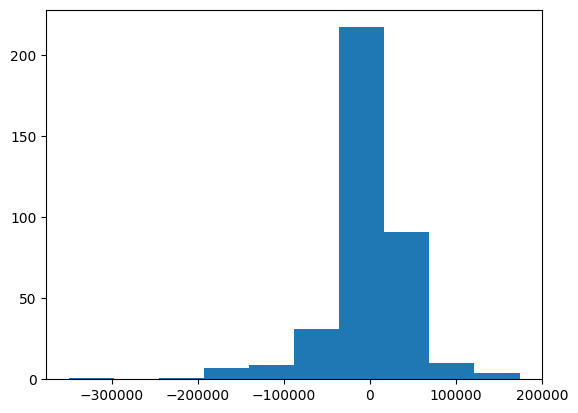

In [335]:
plt.hist(res2['error'])

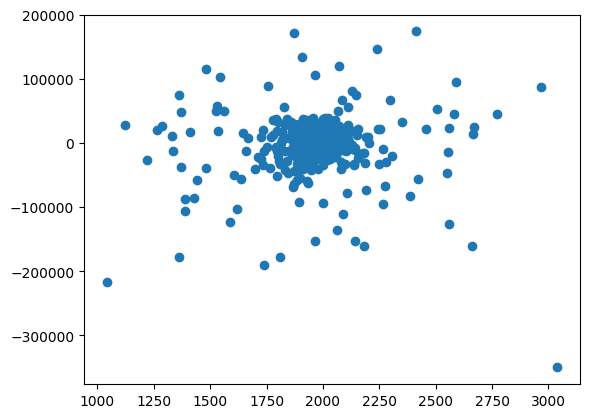

In [336]:
plt.scatter(daily_dataset['sqft_living'],res2['error'])

((array([-2.91387448, -2.62501443, -2.46205562, -2.34623554, -2.25530942,
         -2.17991574, -2.11519298, -2.05827964, -2.00734358, -1.96113835,
         -1.91877606, -1.87960101, -1.84311466, -1.8089288 , -1.77673494,
         -1.74628377, -1.71737077, -1.68982602, -1.66350676, -1.63829182,
         -1.61407745, -1.59077411, -1.56830394, -1.54659883, -1.52559882,
         -1.50525083, -1.48550766, -1.46632712, -1.44767135, -1.42950625,
         -1.41180096, -1.39452751, -1.3776604 , -1.36117637, -1.34505414,
         -1.32927412, -1.31381835, -1.29867019, -1.28381432, -1.2692365 ,
         -1.25492353, -1.24086313, -1.22704385, -1.21345501, -1.20008662,
         -1.18692934, -1.17397438, -1.16121351, -1.14863898, -1.13624349,
         -1.12402017, -1.11196253, -1.10006442, -1.08832003, -1.07672387,
         -1.06527072, -1.05395562, -1.04277388, -1.03172103, -1.02079279,
         -1.00998513, -0.99929417, -0.98871622, -0.97824776, -0.96788543,
         -0.95762599, -0.94746638, -0.

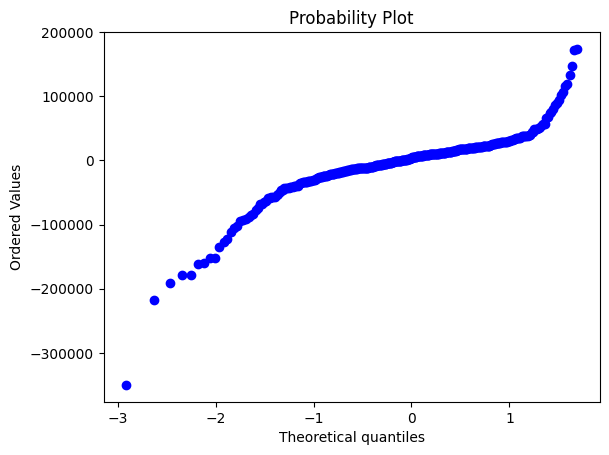

In [337]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res2['error'], dist='norm', plot=ax)

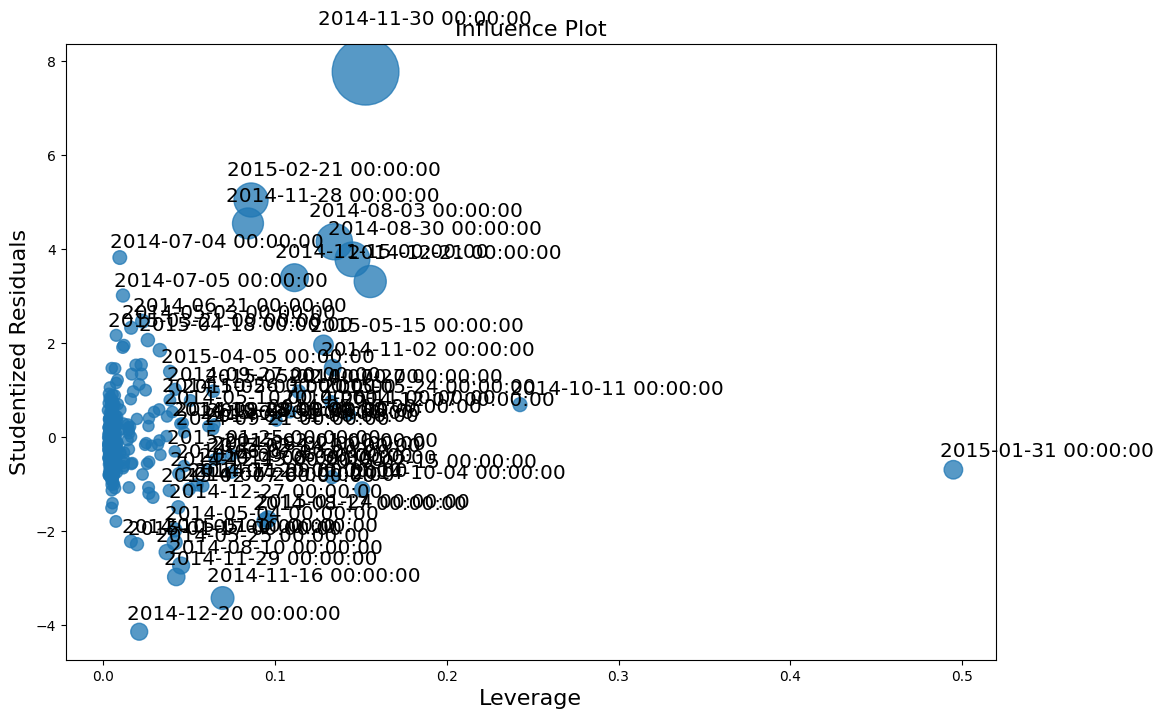

In [338]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_1, ax=ax, criterion='cooks')

In [339]:
house_cleaned.columns.tolist()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'month',
 'day']

In [340]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [341]:
# separate features and target
categorical_features = ['condition','zipcode', 'grade']
numerical_features = ['sqft_living','sqft_lot', 'sqft_living15','sqft_lot15']
target = 'price'

In [342]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(house_cleaned[categorical_features + numerical_features]
                                                    ,house_cleaned[target],
                                                    test_size = 0.3, random_state=1234)

In [343]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [344]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [345]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [346]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition', 'zipcode',
                                                   'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', LinearRegression())])

In [347]:
pred = linear_regression.predict(X_test)

In [348]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(pred,y_test))

89311.30253768242

In [349]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [350]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition', 'zipcode',
                                                   'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', Ridge(alpha=3.0))])

In [351]:
pred_ridge = ridge_regression.predict(X_test)

In [352]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

89366.90991926937

In [353]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [354]:
lasso_regression.fit(X_train, y_train)

c:\Users\Oscar_On\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1953243772199.2031, tolerance: 61503896122.905655
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition', 'zipcode',
                                                   'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', Lasso())])

In [355]:
lasso_pred = lasso_regression.predict(X_test)

In [356]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

89309.28976485386

In [357]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [358]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition', 'zipcode',
                                                   'grade']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [359]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [360]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

150105.55167932223

In [361]:
''' house_cleaned_t1 = house_cleaned

house_cleaned_t2 = house_cleaned

SyntaxError: incomplete input (84362949.py, line 1)

In [ ]:
'''house_cleaned_t1['log_sqft_living'] = np.log(house_cleaned_t1['sqft_living'])

house_cleaned_t1['log_sqft_living15'] = np.log(house_cleaned_t1['sqft_living15'])

house_cleaned_t1['log_sqft_lot'] = np.log(house_cleaned_t1['sqft_lot'])

house_cleaned_t1['log_sqft_lot15'] = np.log(house_cleaned_t1['sqft_lot15'])

house_cleaned_t1['log_price'] = np.log(house_cleaned_t1['price'])'''

In [ ]:
'''house_cleaned_t1.head()

In [ ]:
'''results = ols("log_price ~ log_sqft_living + log_sqft_lot + grade + view + waterfront + bedrooms + bathrooms + log_sqft_living15 + condition + log_sqft_lot15", data=house_cleaned_t1).fit()
print(results.summary())

In [ ]:
''' # take logarithm for columns related to sqft and price column 

house_cleaned['log_sqft_living'] = np.log(house_cleaned['sqft_living'])

house_cleaned['log_sqft_living15'] = np.log(house_cleaned['sqft_living15'])

house_cleaned['log_sqft_lot'] = np.log(house_cleaned['sqft_lot'])

house_cleaned['log_sqft_lot15'] = np.log(house_cleaned['sqft_lot15'])

house_cleaned['log_sqft_above'] = np.log(house_cleaned['sqft_above'])

house_cleaned['log_sqft_basement'] = np.log(house_cleaned['sqft_basement'])

house_cleaned['log_price'] = np.log(house_cleaned['price'])

In [ ]:
''' house_cleaned_t2.columns.tolist()

In [ ]:
'''results = ols("log_price ~ log_sqft_living + log_sqft_lot + grade + view + waterfront + bedrooms + bathrooms + log_sqft_living15 + condition + log_sqft_lot15", data=house_cleaned).fit()
print(results.summary())

In [ ]:
''' daily_dataset = house_cleaned.set_index('date').resample("D").agg({'log_price': 'mean',
    'bedrooms': 'mean',
    'bathrooms': 'mean',
    'log_sqft_living': 'mean',
    'log_sqft_lot': 'mean',
    'floors': 'mean',
    'condition': 'mean',
    'grade': 'mean',
    'sqft_above': 'mean',
    'sqft_basement': 'mean',
    'yr_built': 'mean',
    'yr_renovated': 'mean',
    'log_sqft_living15': 'mean',
    'log_sqft_lot15': 'mean'})

In [ ]:
'''results = ols("log_price ~ log_sqft_living + log_sqft_lot + grade + bedrooms + bathrooms + log_sqft_living15 + condition + log_sqft_lot15", data=daily_dataset).fit()
print(results.summary())

In [ ]:
'''house_cleaned.head()

In [ ]:
'''# Get all column names as a list
column_names = house_t2.columns.tolist()


# Combine all column names into a single variable
correlation_matrix = house_t2[column_names].corr()

print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
''' column_names = house_t2.columns.tolist()
print(column_names)

In [ ]:
''' results = ols("price ~ sqft_living", data=house_t2).fit()
print(results.summary())

In [ ]:
''' # drop column

columns_to_drop = ['waterfront', 'view', 'zipcode', 'sqft_living15', 'sqft_lot15']
house_t2_1 = house_t2_1.drop(columns_to_drop, axis = 1)

In [ ]:
unique_count = house_t2['zipcode'].nunique()
unique_count